# CourseWork 03

- Name : G.L.B.M. Beliwaththa
- ID : 25000276
- Module : DS Lab 01
- Module Code : 4FTC2113

<hr>
<hr>

### Installing the required pip libraries

In [145]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


### Importing the basic needed libraries for handling the DataSet

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<hr>

### Calling the DataSet in

In [147]:
df = pd.read_csv("https://raw.githubusercontent.com/BawanthaBeliwaththa/DSL01_CW03/refs/heads/Dataset/Indian_housing_Delhi_data.csv")

In [148]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


<hr>
<hr>

## Preprocessing

### Checking for Null-Values

In [149]:
df.isnull().sum()

house_type             0
house_size             0
location               0
city                   0
latitude               0
longitude              0
price                  0
currency               0
numBathrooms          25
numBalconies        2263
isNegotiable        4821
priceSqFt           5000
verificationDate       0
description          285
SecurityDeposit        0
Status                 0
dtype: int64

### Getting the count of Duplicated values and removing the duplicated only

In [150]:
df.duplicated().sum()

np.int64(466)

In [151]:
df_new1 = df.drop_duplicates(keep='first')
df_new1.duplicated().sum()

np.int64(0)

In [152]:
df_new1.dtypes

house_type              str
house_size              str
location                str
city                    str
latitude            float64
longitude           float64
price                 int64
currency                str
numBathrooms        float64
numBalconies        float64
isNegotiable            str
priceSqFt           float64
verificationDate        str
description             str
SecurityDeposit         str
Status                  str
dtype: object

<hr>

### Installing the MissingIndicator for get binary indicators for missing values

In [153]:
from sklearn.impute import MissingIndicator

### Letting the MissingIndicator to perform it's task

In [154]:
x = df_new1[['numBathrooms']]
y = df_new1[['numBalconies']]
z = df_new1[['isNegotiable']]
a = df_new1[['priceSqFt']]
b = df_new1[['description']]

In [155]:
indicator = MissingIndicator()
indicator.fit(df_new1)

,"missing_values missing_values: int, float, str, np.nan or None, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`should be set to `np.nan`, since `pd.NA` will be converted to `np.nan`.",nan
,"features features: {'missing-only', 'all'}, default='missing-only'Whether the imputer mask should represent all or a subset offeatures.- If `'missing-only'` (default), the imputer mask will only represent features containing missing values during fit time.- If `'all'`, the imputer mask will represent all features.",'missing-only'
,"sparse sparse: bool or 'auto', default='auto'Whether the imputer mask format should be sparse or dense.- If `'auto'` (default), the imputer mask will be of same type as input.- If `True`, the imputer mask will be a sparse matrix.- If `False`, the imputer mask will be a numpy array.",'auto'
,"error_on_new error_on_new: bool, default=TrueIf `True`, :meth:`transform` will raise an error when there arefeatures with missing values that have no missing values in:meth:`fit`. This is applicable only when `features='missing-only'`.",True


### Transforming the indicated values

In [156]:
df1 = indicator.transform(df_new1)

### Importing other required python libraries by Scikit-learn for performing preprocess

In [157]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

### Columns handling for easy recognize

In [158]:
numerical_cols = df_new1.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_new1.select_dtypes(include=['object']).columns

C:\Users\Bawantha Beliwaththa\AppData\Local\Temp\ipykernel_13940\2262283339.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df_new1.select_dtypes(include=['object']).columns


In [159]:
preprocess = ColumnTransformer([
    ('numerical', 'passthrough', numerical_cols),
    ('categorical', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
])

### Encoding the X values by fitting the transforming the dataset's values

In [160]:
encoded_x = preprocess.fit_transform(df_new1)

In [161]:
categorical_cols1 = preprocess.named_transformers_['categorical'].get_feature_names_out(categorical_cols)

In [162]:
featured = list(categorical_cols1) + list(numerical_cols)

<hr>

### Using the KNNImputer for impute the missing values

In [163]:
imputed = KNNImputer(n_neighbors=2)
imputed_x = imputed.fit_transform(encoded_x)

In [164]:
numeric_data = imputed_x[:, :len(numerical_cols)]

In [165]:
categorical_encoded = imputed_x[:, len(numerical_cols):]
encoder = preprocess.named_transformers_['categorical']

In [166]:
original_categories = encoder.categories_

In [167]:
for i, col in enumerate(categorical_cols):
    print(f"{col}: {original_categories[i]}")

house_type: ['1 BHK Apartment ' '1 BHK Independent Floor ' '1 BHK Independent House '
 '1 RK Studio Apartment ' '10 BHK Independent House '
 '12 BHK Independent House ' '2 BHK Apartment ' '2 BHK Independent Floor '
 '2 BHK Independent House ' '3 BHK Apartment ' '3 BHK Independent Floor '
 '3 BHK Independent House ' '4 BHK Apartment ' '4 BHK Independent Floor '
 '4 BHK Independent House ' '4 BHK Villa ' '5 BHK Apartment '
 '5 BHK Independent Floor ' '5 BHK Independent House ' '5 BHK Villa '
 '6 BHK Independent Floor ' '6 BHK penthouse ' '7 BHK Independent Floor '
 '7 BHK Independent House ' '8 BHK Independent Floor '
 '8 BHK Independent House ' '8 BHK Villa ' '9 BHK Independent House ']
house_size: ['1,000 sq ft' '1,010 sq ft' '1,020 sq ft' '1,050 sq ft' '1,080 sq ft'
 '1,090 sq ft' '1,100 sq ft' '1,110 sq ft' '1,125 sq ft' '1,130 sq ft'
 '1,147 sq ft' '1,150 sq ft' '1,154 sq ft' '1,162 sq ft' '1,170 sq ft'
 '1,180 sq ft' '1,183 sq ft' '1,200 sq ft' '1,210 sq ft' '1,220 sq ft'
 '1,225 s

### Decoding the data after imputing using the KNNImputer

In [168]:
def decode_one_hot(encoded_data, encoder, categorical_cols):
    df_decoded = pd.DataFrame()
    
    start_idx = 0
    for i, col in enumerate(categorical_cols):
        n_categories = len(encoder.categories_[i])
        n_encoded_features = n_categories - 1 if encoder.drop == 'first' else n_categories
        

        col_data = encoded_data[:, start_idx:start_idx + n_encoded_features]
        
        if encoder.drop == 'first':
            col_data = np.hstack([np.zeros((col_data.shape[0], 1)), col_data])
        
        category_indices = np.argmax(col_data, axis=1)
        
        df_decoded[col] = [encoder.categories_[i][idx] for idx in category_indices]
        
        start_idx += n_encoded_features
    
    return df_decoded

In [169]:
categorical_decoded = decode_one_hot(categorical_encoded, encoder, categorical_cols)

In [170]:
df_new2 = pd.DataFrame(numeric_data, columns=numerical_cols)

In [171]:
numerical = df_new2.select_dtypes(include=[np.number])
categorical = df_new2.select_dtypes(include=['object'])

In [172]:
for col in categorical_cols:
    df_new2[col] = categorical_decoded[col]

In [173]:
if not categorical.empty:
    categorical_simple_imputed = SimpleImputer(strategy='most_frequent')
    df_new2[categorical.columns] = categorical_simple_imputed.fit_transform(df_new2[categorical.columns])

### After using the KNNImputer checking if there are missing values left and if there are droping them

In [174]:
df_new2.isnull().sum()

latitude            0
longitude           0
price               0
numBathrooms        0
numBalconies        0
priceSqFt           0
house_type          0
house_size          0
location            0
city                0
currency            0
isNegotiable        1
verificationDate    0
description         0
SecurityDeposit     0
Status              0
dtype: int64

In [175]:
df_new2.dropna()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt,house_type,house_size,location,city,currency,isNegotiable,verificationDate,description,SecurityDeposit,Status
0,28.545561,77.254349,22000.0,1.0,1.0,0.0,1 BHK Independent House,"4,950 sq ft",Kailash hills,Delhi,INR,Negotiable,Posted 9 months ago,Fully furnished flat available for rent in Kal...,"98,000",Furnished
1,28.643259,77.132828,20000.0,1.0,1.0,0.0,1 BHK Independent House,"4,950 sq ft",Mansa Ram Park,Delhi,INR,Negotiable,Posted 8 days ago,Here is an excellent 1 BHK Independent Floor a...,"98,000",Furnished
2,28.618677,77.053352,8500.0,1.0,1.0,0.0,2 BHK Apartment,"5,896 sq ft",Uday Park,Delhi,INR,Negotiable,Posted 11 days ago,Your search for a spacious home at affordable ...,"98,000",Furnished
3,28.712898,77.180000,48000.0,3.0,2.0,0.0,3 BHK Independent Floor,"1,010 sq ft",Mehrauli,Delhi,INR,Negotiable,Posted a month ago,Itâs a 3 bhk independent house situated in M...,"98,000",Furnished
4,28.723539,77.131424,20000.0,2.0,1.0,0.0,12 BHK Independent House,801 sq ft,Sector 13 Dwarka,Delhi,INR,Negotiable,Posted a month ago,Well designed 2 bhk multistorey apartment is a...,"98,000",Semi-Furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,28.618437,76.961784,1022001.0,4.0,2.0,0.0,4 BHK Independent House,"5,893 sq ft",Sundar Nagar,Delhi,INR,Negotiable,Posted 2 hours ago,Its four bhk villa in the super location of De...,"40,10,101",Semi-Furnished
4530,28.618437,76.961784,1549181.0,4.0,2.0,0.0,5 BHK Independent Floor,"6,400 sq ft",Sundar Nagar,Delhi,INR,Negotiable,Posted 2 hours ago,A 5 bhk property is available for rent in Sund...,"54,01,014",Semi-Furnished
4531,28.567051,77.273560,301012.0,3.0,2.0,0.0,3 BHK Apartment,"1,851 sq ft",New Ashok Nagar,Delhi,INR,Negotiable,Posted 2 hours ago,Its three bhk builder floor in the super locat...,"18,18,128",Semi-Furnished
4532,28.567051,77.273560,301011.0,3.0,2.0,0.0,3 BHK Apartment,"2,855 sq ft",New Ashok Nagar,Delhi,INR,Negotiable,Posted 2 hours ago,Its three bhk builder floor in the super locat...,"10,10,104",Semi-Furnished


In [176]:
df_new2.head()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt,house_type,house_size,location,city,currency,isNegotiable,verificationDate,description,SecurityDeposit,Status
0,28.545561,77.254349,22000.0,1.0,1.0,0.0,1 BHK Independent House,"4,950 sq ft",Kailash hills,Delhi,INR,Negotiable,Posted 9 months ago,Fully furnished flat available for rent in Kal...,"98,000",Furnished
1,28.643259,77.132828,20000.0,1.0,1.0,0.0,1 BHK Independent House,"4,950 sq ft",Mansa Ram Park,Delhi,INR,Negotiable,Posted 8 days ago,Here is an excellent 1 BHK Independent Floor a...,"98,000",Furnished
2,28.618677,77.053352,8500.0,1.0,1.0,0.0,2 BHK Apartment,"5,896 sq ft",Uday Park,Delhi,INR,Negotiable,Posted 11 days ago,Your search for a spacious home at affordable ...,"98,000",Furnished
3,28.712898,77.180000,48000.0,3.0,2.0,0.0,3 BHK Independent Floor,"1,010 sq ft",Mehrauli,Delhi,INR,Negotiable,Posted a month ago,Itâs a 3 bhk independent house situated in M...,"98,000",Furnished
4,28.723539,77.131424,20000.0,2.0,1.0,0.0,12 BHK Independent House,801 sq ft,Sector 13 Dwarka,Delhi,INR,Negotiable,Posted a month ago,Well designed 2 bhk multistorey apartment is a...,"98,000",Semi-Furnished


<hr>

### Remarking the Target column 'Status' as there are string  values and mapping them into numerical values 

In [177]:
map = {"Furnished":2 , "Unfurnished":0 , "Semi-Furnished": 1}
df_new2['Status'] = df_new2['Status'].map(map)

In [178]:
df_new2.head()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt,house_type,house_size,location,city,currency,isNegotiable,verificationDate,description,SecurityDeposit,Status
0,28.545561,77.254349,22000.0,1.0,1.0,0.0,1 BHK Independent House,"4,950 sq ft",Kailash hills,Delhi,INR,Negotiable,Posted 9 months ago,Fully furnished flat available for rent in Kal...,"98,000",2
1,28.643259,77.132828,20000.0,1.0,1.0,0.0,1 BHK Independent House,"4,950 sq ft",Mansa Ram Park,Delhi,INR,Negotiable,Posted 8 days ago,Here is an excellent 1 BHK Independent Floor a...,"98,000",2
2,28.618677,77.053352,8500.0,1.0,1.0,0.0,2 BHK Apartment,"5,896 sq ft",Uday Park,Delhi,INR,Negotiable,Posted 11 days ago,Your search for a spacious home at affordable ...,"98,000",2
3,28.712898,77.180000,48000.0,3.0,2.0,0.0,3 BHK Independent Floor,"1,010 sq ft",Mehrauli,Delhi,INR,Negotiable,Posted a month ago,Itâs a 3 bhk independent house situated in M...,"98,000",2
4,28.723539,77.131424,20000.0,2.0,1.0,0.0,12 BHK Independent House,801 sq ft,Sector 13 Dwarka,Delhi,INR,Negotiable,Posted a month ago,Well designed 2 bhk multistorey apartment is a...,"98,000",1


<hr>

### Dropping these two columns "Currency" - Currency is only INR, "City" -  The Dataset is having only the values of Delhi

In [179]:
df_new2 = df_new2.drop(columns=['currency', 'city'])

In [180]:
df_new2.head()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt,house_type,house_size,location,isNegotiable,verificationDate,description,SecurityDeposit,Status
0,28.545561,77.254349,22000.0,1.0,1.0,0.0,1 BHK Independent House,"4,950 sq ft",Kailash hills,Negotiable,Posted 9 months ago,Fully furnished flat available for rent in Kal...,"98,000",2
1,28.643259,77.132828,20000.0,1.0,1.0,0.0,1 BHK Independent House,"4,950 sq ft",Mansa Ram Park,Negotiable,Posted 8 days ago,Here is an excellent 1 BHK Independent Floor a...,"98,000",2
2,28.618677,77.053352,8500.0,1.0,1.0,0.0,2 BHK Apartment,"5,896 sq ft",Uday Park,Negotiable,Posted 11 days ago,Your search for a spacious home at affordable ...,"98,000",2
3,28.712898,77.180000,48000.0,3.0,2.0,0.0,3 BHK Independent Floor,"1,010 sq ft",Mehrauli,Negotiable,Posted a month ago,Itâs a 3 bhk independent house situated in M...,"98,000",2
4,28.723539,77.131424,20000.0,2.0,1.0,0.0,12 BHK Independent House,801 sq ft,Sector 13 Dwarka,Negotiable,Posted a month ago,Well designed 2 bhk multistorey apartment is a...,"98,000",1


In [181]:
df_new2.dtypes

latitude            float64
longitude           float64
price               float64
numBathrooms        float64
numBalconies        float64
priceSqFt           float64
house_type              str
house_size              str
location                str
isNegotiable            str
verificationDate        str
description             str
SecurityDeposit         str
Status                int64
dtype: object

## Preprocessing is Done

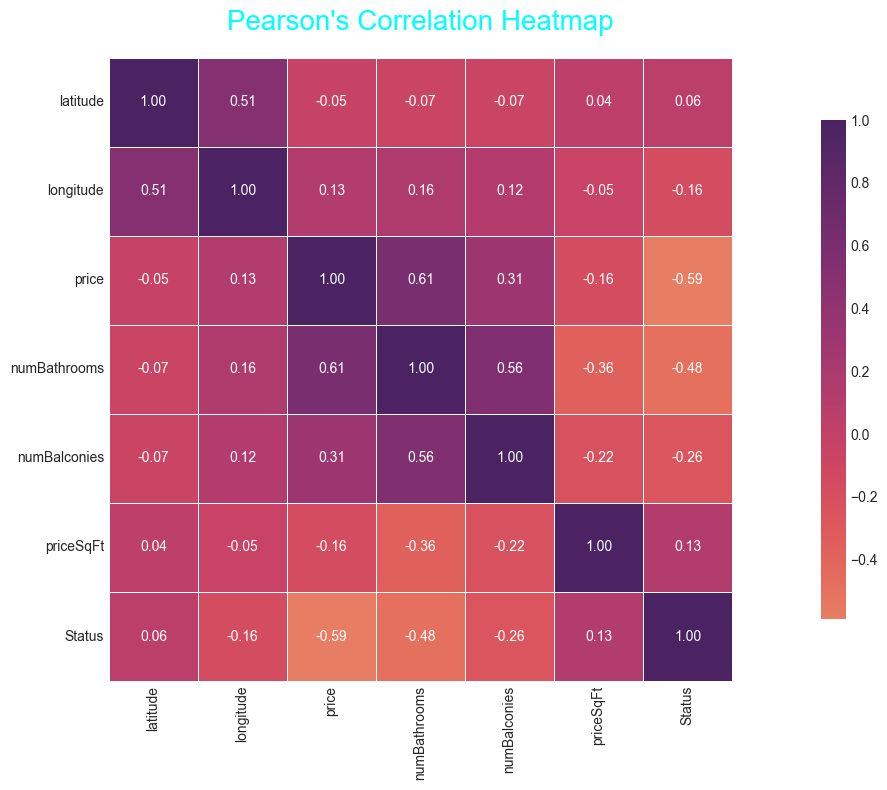

In [182]:
num_df = df_new2.select_dtypes(include=[np.number])
pearson_corr = num_df.corr(method='pearson')

plt.figure(figsize=(18, 8), facecolor='none')


sns.heatmap(pearson_corr, annot=True, cmap='flare', center=0, 
            square=True, fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Pearson's Correlation Heatmap", fontsize=20, pad=20, color='cyan')


plt.tight_layout()
plt.savefig('correlation_heatmaps.png', dpi=300)
plt.show()

<hr>
<hr>

## Model creation

### Importing the reqired pip libraries by Scikit-learn for model creation and get the results

In [183]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### Starting the Training

In [184]:
X = df_new2.drop(columns=['Status'])
y = df_new2['Status']
X

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt,house_type,house_size,location,isNegotiable,verificationDate,description,SecurityDeposit
0,28.545561,77.254349,22000.0,1.0,1.0,0.0,1 BHK Independent House,"4,950 sq ft",Kailash hills,Negotiable,Posted 9 months ago,Fully furnished flat available for rent in Kal...,"98,000"
1,28.643259,77.132828,20000.0,1.0,1.0,0.0,1 BHK Independent House,"4,950 sq ft",Mansa Ram Park,Negotiable,Posted 8 days ago,Here is an excellent 1 BHK Independent Floor a...,"98,000"
2,28.618677,77.053352,8500.0,1.0,1.0,0.0,2 BHK Apartment,"5,896 sq ft",Uday Park,Negotiable,Posted 11 days ago,Your search for a spacious home at affordable ...,"98,000"
3,28.712898,77.180000,48000.0,3.0,2.0,0.0,3 BHK Independent Floor,"1,010 sq ft",Mehrauli,Negotiable,Posted a month ago,Itâs a 3 bhk independent house situated in M...,"98,000"
4,28.723539,77.131424,20000.0,2.0,1.0,0.0,12 BHK Independent House,801 sq ft,Sector 13 Dwarka,Negotiable,Posted a month ago,Well designed 2 bhk multistorey apartment is a...,"98,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,28.618437,76.961784,1022001.0,4.0,2.0,0.0,4 BHK Independent House,"5,893 sq ft",Sundar Nagar,Negotiable,Posted 2 hours ago,Its four bhk villa in the super location of De...,"40,10,101"
4530,28.618437,76.961784,1549181.0,4.0,2.0,0.0,5 BHK Independent Floor,"6,400 sq ft",Sundar Nagar,Negotiable,Posted 2 hours ago,A 5 bhk property is available for rent in Sund...,"54,01,014"
4531,28.567051,77.273560,301012.0,3.0,2.0,0.0,3 BHK Apartment,"1,851 sq ft",New Ashok Nagar,Negotiable,Posted 2 hours ago,Its three bhk builder floor in the super locat...,"18,18,128"
4532,28.567051,77.273560,301011.0,3.0,2.0,0.0,3 BHK Apartment,"2,855 sq ft",New Ashok Nagar,Negotiable,Posted 2 hours ago,Its three bhk builder floor in the super locat...,"10,10,104"


In [185]:
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

C:\Users\Bawantha Beliwaththa\AppData\Local\Temp\ipykernel_13940\1867255249.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


### Using the Scalers for scaling process

In [186]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
])

In [187]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [188]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

d:\UH\1st Year\sem 02\DS Lab 01\CW3\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [1, 2, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


<hr>

### Creating the Model using RandomForestRegressor

In [189]:
model = GradientBoostingRegressor(n_estimators=100, max_depth=5)


In [190]:
df_new2.head()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt,house_type,house_size,location,isNegotiable,verificationDate,description,SecurityDeposit,Status
0,28.545561,77.254349,22000.0,1.0,1.0,0.0,1 BHK Independent House,"4,950 sq ft",Kailash hills,Negotiable,Posted 9 months ago,Fully furnished flat available for rent in Kal...,"98,000",2
1,28.643259,77.132828,20000.0,1.0,1.0,0.0,1 BHK Independent House,"4,950 sq ft",Mansa Ram Park,Negotiable,Posted 8 days ago,Here is an excellent 1 BHK Independent Floor a...,"98,000",2
2,28.618677,77.053352,8500.0,1.0,1.0,0.0,2 BHK Apartment,"5,896 sq ft",Uday Park,Negotiable,Posted 11 days ago,Your search for a spacious home at affordable ...,"98,000",2
3,28.712898,77.180000,48000.0,3.0,2.0,0.0,3 BHK Independent Floor,"1,010 sq ft",Mehrauli,Negotiable,Posted a month ago,Itâs a 3 bhk independent house situated in M...,"98,000",2
4,28.723539,77.131424,20000.0,2.0,1.0,0.0,12 BHK Independent House,801 sq ft,Sector 13 Dwarka,Negotiable,Posted a month ago,Well designed 2 bhk multistorey apartment is a...,"98,000",1


### Model fitting

In [191]:
model.fit(X_train_processed, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",5
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In [192]:
y_pred_train = model.predict(X_train_processed)
y_pred_test = model.predict(X_test_processed)
y_pred_train

array([1.01611419, 1.94157778, 1.01611419, ..., 1.93311828, 1.01611419,
       1.9645731 ], shape=(3627,))

In [193]:
y_pred_test

array([1.97071622, 1.95259671, 1.92795969, 1.95259671, 1.02225731,
       1.90874308, 1.01611419, 1.01611419, 1.01611419, 1.02225731,
       1.01611419, 1.01611419, 1.01611419, 1.94157778, 1.94157778,
       1.01611419, 1.97071622, 1.01611419, 1.01611419, 1.01611419,
       1.01611419, 1.93750238, 1.95259671, 1.01611419, 1.01611419,
       1.01611419, 1.01611419, 1.92404224, 1.01611419, 1.9567206 ,
       1.02225731, 1.92795969, 1.01611419, 1.01611419, 1.92209936,
       1.95259671, 1.93245315, 1.01611419, 1.9567206 , 1.94157778,
       1.92795969, 1.92372804, 1.94157778, 1.95541114, 1.91328226,
       1.93276068, 1.95259671, 1.9567206 , 1.01611419, 1.01611419,
       1.9567206 , 1.88553582, 1.88056562, 1.93847249, 1.92404224,
       1.93064831, 1.95259671, 1.01611419, 1.95259671, 1.01611419,
       1.92938993, 1.91067614, 1.9567206 , 1.94157778, 1.9567206 ,
       1.94157778, 1.01611419, 1.9567206 , 1.01611419, 1.84347451,
       1.01611419, 1.01611419, 1.9567206 , 1.01611419, 1.94157

<hr>

### Having the results of our Regression Model

In [194]:
def evaluate_model(y_trued, y_pred, dataset_name):
    mse = mean_squared_error(y_trued, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_trued, y_pred)
    r2 = r2_score(y_trued, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    
    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}


train_metrics = evaluate_model(y_train, y_pred_train, "Training")
test_metrics = evaluate_model(y_test, y_pred_test, "Testing")


Training Metrics:
  MSE: 0.0217
  RMSE: 0.1474
  MAE: 0.0755
  R² Score: 0.9124

Testing Metrics:
  MSE: 0.0443
  RMSE: 0.2106
  MAE: 0.0928
  R² Score: 0.8205


<hr>
<hr>

## Visualizations

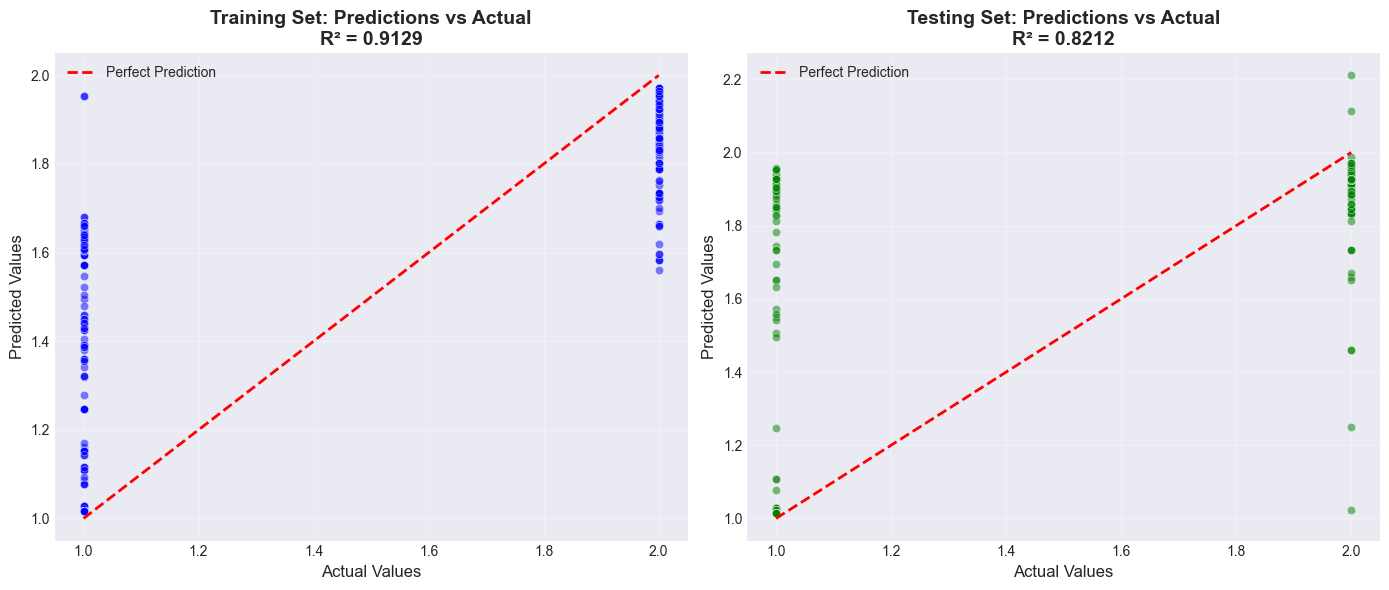

In [195]:
# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training set
axes[0].scatter(y_train, y_pred_train, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)
axes[0].plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title(f'Training Set: Predictions vs Actual\nR² = 0.9129', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_pred_test, alpha=0.5, c='green', edgecolors='w', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Values', fontsize=12)
axes[1].set_ylabel('Predicted Values', fontsize=12)
axes[1].set_title(f'Testing Set: Predictions vs Actual\nR² = 0.8212', 
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('prediction_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

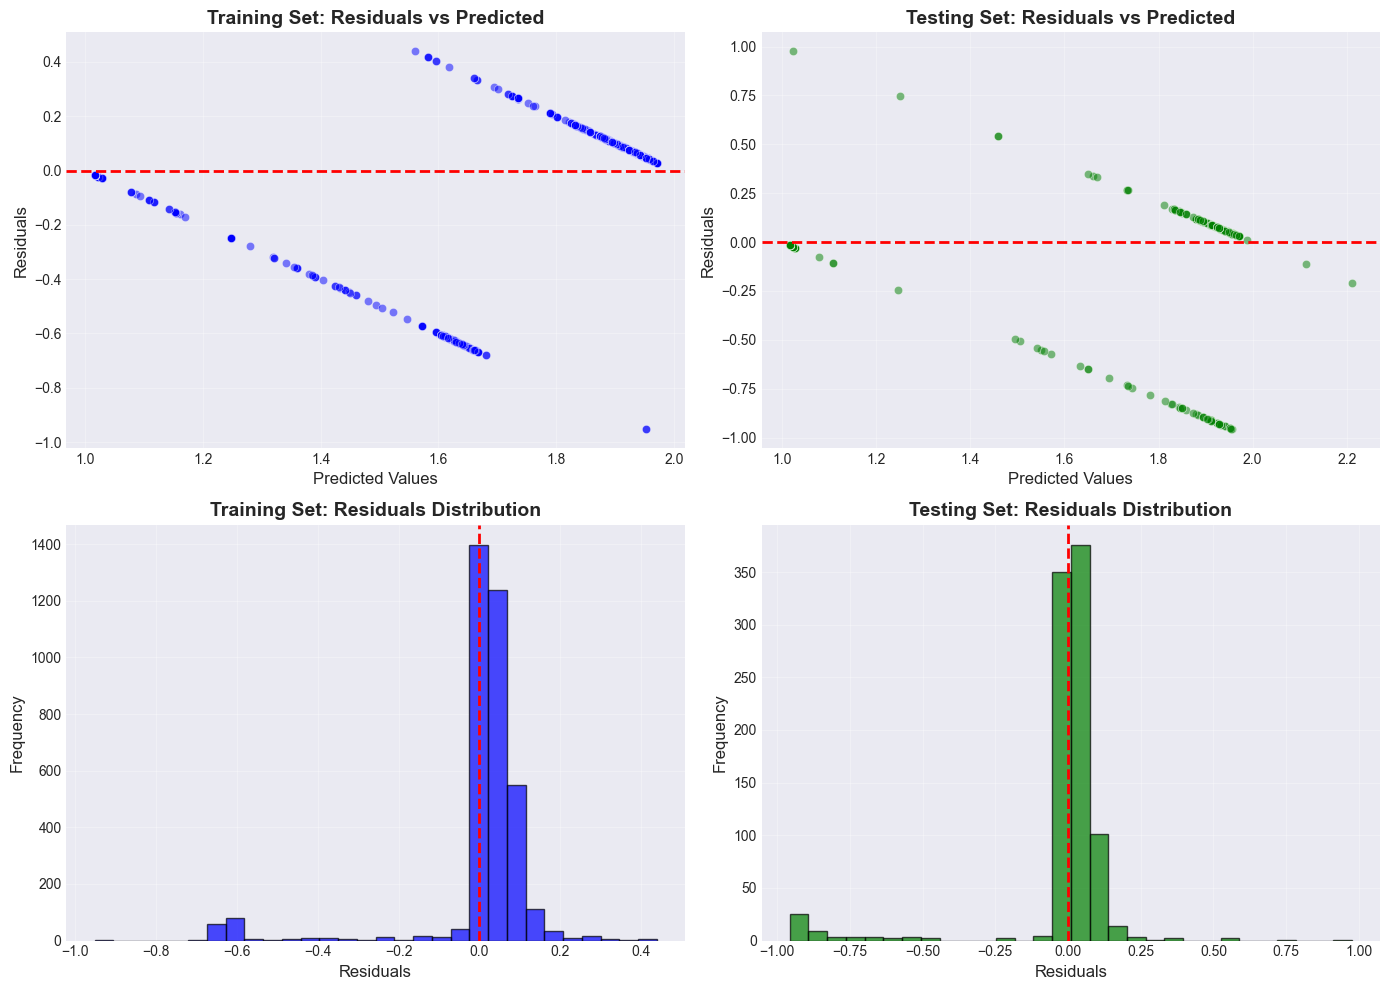

In [196]:
# Calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Training residuals scatter
axes[0, 0].scatter(y_pred_train, residuals_train, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 0].set_xlabel('Predicted Values', fontsize=12)
axes[0, 0].set_ylabel('Residuals', fontsize=12)
axes[0, 0].set_title('Training Set: Residuals vs Predicted', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Testing residuals scatter
axes[0, 1].scatter(y_pred_test, residuals_test, alpha=0.5, c='green', edgecolors='w', linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values', fontsize=12)
axes[0, 1].set_ylabel('Residuals', fontsize=12)
axes[0, 1].set_title('Testing Set: Residuals vs Predicted', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Training residuals histogram
axes[1, 0].hist(residuals_train, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Residuals', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Training Set: Residuals Distribution', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Testing residuals histogram
axes[1, 1].hist(residuals_test, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Residuals', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('Testing Set: Residuals Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residual_plots.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

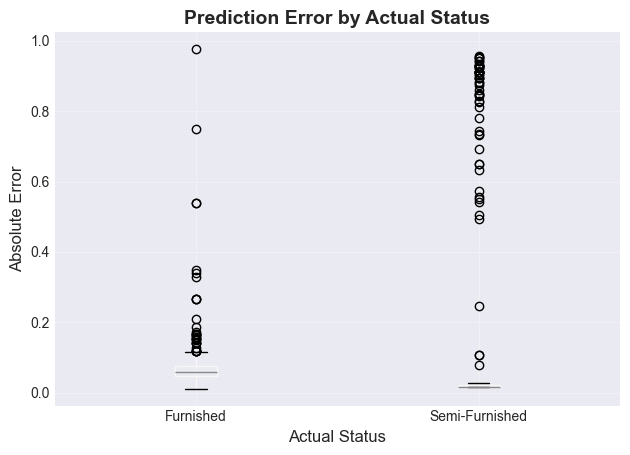

In [197]:
# Create a DataFrame with results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test,
    'Error': np.abs(y_test - y_pred_test)
})

# Map numeric values back to categories
status_map_reverse = {2: 'Furnished', 1: 'Semi-Furnished', 0: 'Unfurnished'}
results_df['Actual_Status'] = results_df['Actual'].map(status_map_reverse)

plt.figure(figsize=(10, 6))
results_df.boxplot(column='Error', by='Actual_Status')
plt.title('Prediction Error by Actual Status', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Actual Status', fontsize=12)
plt.ylabel('Absolute Error', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('error_by_category.png', dpi=300, bbox_inches='tight')
plt.show()